In [24]:
from sympy import symbols, Function, simplify, lambdify

# Define symbols
x, t = symbols('x t')
def fact(n):
    res = 1
    for i in range(1, n + 1):
        res *= i
    return res

def bernstein_polynomial(f, n: int):
    B = 0
    for k in range(n+1):
        B += f.subs(x, k/n) * (fact(n) // (fact(k) * fact(n-k))) * t**k * (1-t)**(n-k)
    return simplify(B)

f = 1/(1+50*(x-.5)**2)  


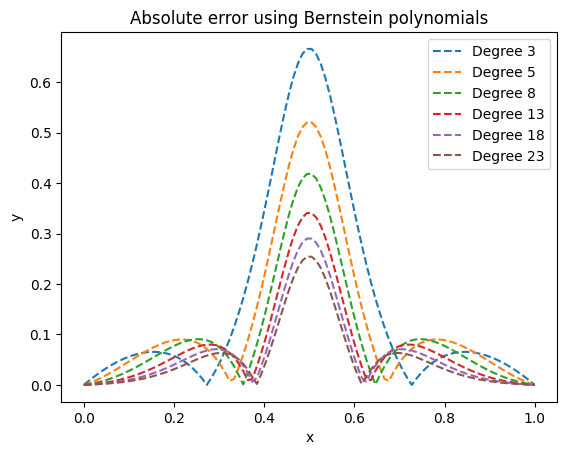

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
# Convert the SymPy expressions to numpy functions for plotting
f_numpy = lambdify(x, f, 'numpy')


x_values = np.linspace(0, 1, 100)
y_values_function = f_numpy(x_values)

# Plot the Bernstein Polynomial
for deg in [3, 5, 8, 13, 18, 23]:
    bernstein_poly = bernstein_polynomial(f, deg)
    bernstein_poly_numpy = lambdify(t, bernstein_poly, 'numpy')
    t_values = np.linspace(0, 1, 100)
    y_values_polynomial = bernstein_poly_numpy(t_values)
    plt.plot(t_values, np.abs(y_values_polynomial - y_values_function), label=f'Degree {deg}', linestyle='--')

plt.title('Absolute error using Bernstein polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()